# This notebook will demontrate how to create a portfolio using Efficient Frontier optimization for every stock present on S&P500 Fund

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random
import yfinance as yf
from tqdm.notebook import tqdm
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, plotting, CovarianceShrinkage

In [68]:
data = pd.read_csv(
    "stock_portfolio_data/s&p500_stocks.csv", sep=";", encoding="latin-1"
)
start_date = "2013-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")
stocks = data["Symbol"]
print(stocks)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


In [69]:
df_tech_stocks = pd.DataFrame()

for stock in tqdm(stocks):
    df_tech_stocks[stock] = yf.download(stock, start=start_date, end=end_date)[
        "Adj Close"
    ]
df_tech_stocks

  0%|          | 0/503 [00:00<?, ?it/s]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,66.843231,13.710299,25.875967,22.207655,56.624977,38.340000,2.530000,7.880209,20.715118,27.237345,...,74.346962,171.147598,95.529976,19.223896,23.749271,39.127850,40.959999,60.087959,17.587208,NaN
2013-01-03,66.765648,13.495975,26.860950,22.024277,56.419998,37.750000,2.490000,7.837224,20.190254,27.334896,...,75.106506,170.603851,96.557526,19.167734,23.671547,39.372532,41.000000,60.948898,17.611202,NaN
2013-01-04,67.259338,13.642394,26.699478,21.746052,56.731575,38.130001,2.590000,8.023485,19.937389,27.874693,...,75.084793,171.716095,97.722610,19.237946,23.637003,39.803669,40.669998,61.259529,18.115063,NaN
2013-01-07,67.343987,13.491731,26.917463,21.790316,56.485584,37.939999,2.670000,7.772753,19.860762,27.673090,...,74.867813,170.644989,98.054367,19.034327,23.326101,39.553154,40.900002,61.410404,18.027088,NaN
2013-01-08,67.351006,13.748495,26.925533,21.316059,56.813557,38.139999,2.670000,7.772753,20.090635,27.451963,...,74.498878,167.794327,97.973434,19.069435,23.041109,37.892723,40.930000,61.499172,17.667191,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,108.860001,79.269997,111.859612,159.902237,340.350006,580.549988,146.179993,19.070000,82.870003,133.380005,...,242.169998,822.229980,97.050003,63.580002,112.849998,128.639999,261.089996,121.970001,44.540001,196.149994
2024-01-09,109.099998,79.839996,112.188026,160.773911,342.750000,586.200012,149.259995,18.860001,80.550003,130.679993,...,239.869995,823.989990,95.260002,63.270000,112.110001,128.220001,256.440002,121.870003,44.040001,195.940002
2024-01-10,108.300003,80.480003,113.849998,163.329498,345.329987,591.030029,148.539993,18.879999,82.639999,131.089996,...,245.440002,830.830017,93.629997,62.720001,112.239998,129.199997,255.270004,123.230003,43.930000,198.770004


In [70]:
df_tech_stocks = df_tech_stocks.dropna(axis=1)
df_tech_stocks

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,66.843231,13.710299,25.875967,22.207655,56.624977,38.340000,2.530000,7.880209,20.715118,27.237345,...,18.186485,74.346962,171.147598,95.529976,19.223896,23.749271,39.127850,40.959999,60.087959,17.587208
2013-01-03,66.765648,13.495975,26.860950,22.024277,56.419998,37.750000,2.490000,7.837224,20.190254,27.334896,...,18.047537,75.106506,170.603851,96.557526,19.167734,23.671547,39.372532,41.000000,60.948898,17.611202
2013-01-04,67.259338,13.642394,26.699478,21.746052,56.731575,38.130001,2.590000,8.023485,19.937389,27.874693,...,18.245275,75.084793,171.716095,97.722610,19.237946,23.637003,39.803669,40.669998,61.259529,18.115063
2013-01-07,67.343987,13.491731,26.917463,21.790316,56.485584,37.939999,2.670000,7.772753,19.860762,27.673090,...,18.165113,74.867813,170.644989,98.054367,19.034327,23.326101,39.553154,40.900002,61.410404,18.027088
2013-01-08,67.351006,13.748495,26.925533,21.316059,56.813557,38.139999,2.670000,7.772753,20.090635,27.451963,...,17.940647,74.498878,167.794327,97.973434,19.069435,23.041109,37.892723,40.930000,61.499172,17.667191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,108.860001,79.269997,111.859612,159.902237,340.350006,580.549988,146.179993,19.070000,82.870003,133.380005,...,35.650002,242.169998,822.229980,97.050003,63.580002,112.849998,128.639999,261.089996,121.970001,44.540001
2024-01-09,109.099998,79.839996,112.188026,160.773911,342.750000,586.200012,149.259995,18.860001,80.550003,130.679993,...,35.419998,239.869995,823.989990,95.260002,63.270000,112.110001,128.220001,256.440002,121.870003,44.040001
2024-01-10,108.300003,80.480003,113.849998,163.329498,345.329987,591.030029,148.539993,18.879999,82.639999,131.089996,...,35.230000,245.440002,830.830017,93.629997,62.720001,112.239998,129.199997,255.270004,123.230003,43.930000


In [71]:
# Calculate simple returns

daily_simple_returns = df_tech_stocks.pct_change(1)
daily_simple_returns

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.001161,-0.015632,0.038066,-0.008257,-0.003620,-0.015389,-0.015810,-0.005455,-0.025337,0.003582,...,-0.007640,0.010216,-0.003177,0.010756,-0.002921,-0.003273,0.006253,0.000977,0.014328,0.001364
2013-01-04,0.007394,0.010849,-0.006011,-0.012633,0.005522,0.010066,0.040161,0.023766,-0.012524,0.019748,...,0.010957,-0.000289,0.006519,0.012066,0.003663,-0.001459,0.010950,-0.008049,0.005097,0.028610
2013-01-07,0.001259,-0.011044,0.008164,0.002035,-0.004336,-0.004983,0.030888,-0.031250,-0.003843,-0.007232,...,-0.004394,-0.002890,-0.006238,0.003395,-0.010584,-0.013153,-0.006294,0.005655,0.002463,-0.004856
2013-01-08,0.000104,0.019031,0.000300,-0.021765,0.005806,0.005272,0.000000,0.000000,0.011574,-0.007991,...,-0.012357,-0.004928,-0.016705,-0.000825,0.001844,-0.012218,-0.041980,0.000733,0.001445,-0.019964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,0.002486,0.002910,0.014440,-0.004379,0.011081,0.028250,0.054842,0.014362,0.001813,0.021599,...,0.002813,0.013815,0.004299,0.014637,-0.002354,0.006242,0.002338,0.033242,0.016586,0.011124
2024-01-09,0.002205,0.007191,0.002936,0.005451,0.007052,0.009732,0.021070,-0.011012,-0.027996,-0.020243,...,-0.006452,-0.009497,0.002141,-0.018444,-0.004876,-0.006557,-0.003265,-0.017810,-0.000820,-0.011226
2024-01-10,-0.007333,0.008016,0.014814,0.015896,0.007527,0.008240,-0.004824,0.001060,0.025947,0.003137,...,-0.005364,0.023221,0.008301,-0.017111,-0.008693,0.001160,0.007643,-0.004562,0.011159,-0.002498


In [72]:
# Mean of daily simple returns

mean_daily_returns = daily_simple_returns.mean()
mean_daily_returns

MMM     0.000274
AOS     0.000780
ABT     0.000640
ABBV    0.000858
ACN     0.000775
          ...   
XYL     0.000700
YUM     0.000544
ZBRA    0.000940
ZBH     0.000395
ZION    0.000586
Length: 460, dtype: float64

In [73]:
# Show the annualized returns
mean_daily_returns * 252

MMM     0.068987
AOS     0.196571
ABT     0.161183
ABBV    0.216167
ACN     0.195392
          ...   
XYL     0.176432
YUM     0.137028
ZBRA    0.236872
ZBH     0.099536
ZION    0.147602
Length: 460, dtype: float64

In [74]:
# Sort the values for daily mean simple returns and show  the annualized returns as a percentage

mean_daily_returns = mean_daily_returns.sort_values(
    axis=0,
    ascending=False,
    kind="quicksort",
    na_position="last",
    ignore_index="False",
    key=None,
)
mean_daily_returns * 252 * 100

0      62.670796
1      57.366679
2      57.218754
3      53.034794
4      43.805601
         ...    
455     2.880439
456     1.564417
457     1.081203
458     0.006922
459    -1.833597
Length: 460, dtype: float64

In [75]:
# Optimize the portfolio
# Calculate expected returns and the annualized sample covariance matrix of daily asset returns
mu = expected_returns.mean_historical_return(prices=df_tech_stocks)
S = risk_models.sample_cov(prices=df_tech_stocks)

Sharp Ratio: describes how much excess return you receive for the extra volatility you endure for holding a riskier asset
A good sharp ratio may be considered as >2.0 -> good, >3.0 -> excellent and <1.0 -> suboptimal.

In [76]:
# Optimize for maximal sharp ratio
ef = EfficientFrontier(expected_returns=mu, cov_matrix=S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)
print(cleaned_weights)

Expected annual return: 33.6%
Annual volatility: 18.7%
Sharpe Ratio: 1.69
OrderedDict([('MMM', 0.0), ('AOS', 0.0), ('ABT', 0.0), ('ABBV', 0.0), ('ACN', 0.0), ('ADBE', 0.0), ('AMD', 0.0), ('AES', 0.0), ('AFL', 0.0), ('A', 0.0), ('APD', 0.0), ('AKAM', 0.0), ('ALB', 0.0), ('ARE', 0.0), ('ALGN', 0.0), ('LNT', 0.0), ('ALL', 0.0), ('GOOGL', 0.0), ('GOOG', 0.0), ('MO', 0.0), ('AMZN', 0.0), ('AMCR', 0.0), ('AEE', 0.0), ('AAL', 0.0), ('AEP', 0.0), ('AXP', 0.0), ('AIG', 0.0), ('AMT', 0.0), ('AWK', 0.0), ('AMP', 0.0), ('AME', 0.0), ('AMGN', 0.0), ('APH', 0.0), ('ADI', 0.0), ('ANSS', 0.0), ('AON', 0.0), ('APA', 0.0), ('AAPL', 0.0), ('AMAT', 0.0), ('APTV', 0.0), ('ACGL', 0.0), ('ADM', 0.0), ('AJG', 0.0), ('AIZ', 0.0), ('T', 0.0), ('ATO', 0.0), ('ADSK', 0.0), ('ADP', 0.0), ('AZO', 0.0), ('AVB', 0.0), ('AVY', 0.0), ('AXON', 0.00117), ('BKR', 0.0), ('BALL', 0.0), ('BAC', 0.0), ('BK', 0.0), ('BBWI', 0.0), ('BAX', 0.0), ('BDX', 0.0), ('BBY', 0.0), ('BIO', 0.0), ('TECH', 0.0), ('BIIB', 0.0), ('BLK', 0.0)

In [80]:
# Get the discrete allocation of each share per Stock.

portfolio_val = 10_000
latest_prices = df_tech_stocks.tail(1).squeeze()
weights = cleaned_weights
da = DiscreteAllocation(
    weights=weights,
    latest_prices=latest_prices,
    total_portfolio_value=portfolio_val,
)
allocation, portfolio_leftover = da.lp_portfolio()

print(f"Discrete Allocation: {allocation}")
print(f"Funds remaining: ${portfolio_leftover}")

Discrete Allocation: {'AVGO': 1, 'CBOE': 2, 'DXCM': 3, 'DPZ': 1, 'LLY': 3, 'KDP': 15, 'KR': 1, 'NOC': 1, 'NVDA': 3, 'PGR': 9, 'TSLA': 2, 'WM': 3}
Funds remaining: $666.7601858760663


/Users/tdafonseca/Desktop/6-Github/learning/portfolio-optimization/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [81]:
# Get the discrete allocation values

discrete_allocation_list = []
for symbol in allocation:
    discrete_allocation_list.append(allocation.get(symbol))
discrete_allocation_list

[1, 2, 3, 1, 3, 15, 1, 1, 3, 9, 2, 3]

In [96]:
# Create a new DF for the new portfolio
porfolio_df = pd.DataFrame(
    columns=["Company Ticker", f"Discrete Value {str(portfolio_val)}"]
)

# Add data to the dataframe
porfolio_df["Company Ticker"] = allocation.keys()
porfolio_df[f"Discrete Value {str(portfolio_val)}"] = discrete_allocation_list

tickers = list(allocation.keys())
porfolio_df["Price"] = latest_prices[tickers].values

porfolio_df

,Company Ticker,Discrete Value 10000,Price
0,AVGO,1,1107.680054
1,CBOE,2,180.679993
2,DXCM,3,125.000000
3,DPZ,1,411.299988
4,LLY,3,642.919983
5,KDP,15,31.910000
6,KR,1,46.029999
7,NOC,1,481.079987
8,NVDA,3,547.099976
9,PGR,9,168.899994


ef = EfficientFrontier(expected_returns=mu, cov_matrix=S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

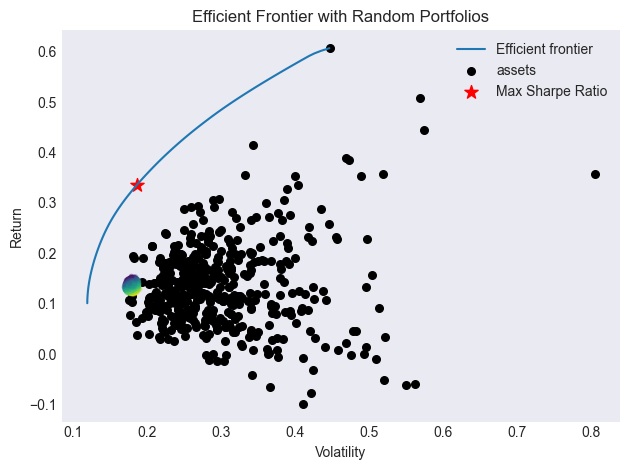

In [112]:
# Visualize our portfolio Sharp Ratio performance
mu = expected_returns.mean_historical_return(df_tech_stocks)
S = risk_models.sample_cov(df_tech_stocks)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(expected_returns=mu, cov_matrix=S, solver="ECOS")
weights = ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()

# Create a new instance for plotting the efficient frontier
ef_for_plotting = EfficientFrontier(expected_returns=mu, cov_matrix=S, solver="ECOS")

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(opt=ef_for_plotting, ax=ax, show_assets=True)

# Mark the point for max Sharpe ratio on the plot
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe Ratio")

# Generate random portfolios
n_samples = 100_000
w = np.random.dirichlet(alpha=np.ones(shape=len(mu)), size=n_samples)
rets = w.dot(mu.T)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", alpha=0.3)

# Output
ax.set_title("Efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("./figures/killer_tech_portfolio_ef_scatter_notebook.png")
plt.show()

/Users/tdafonseca/Desktop/6-Github/learning/portfolio-optimization/.venv/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


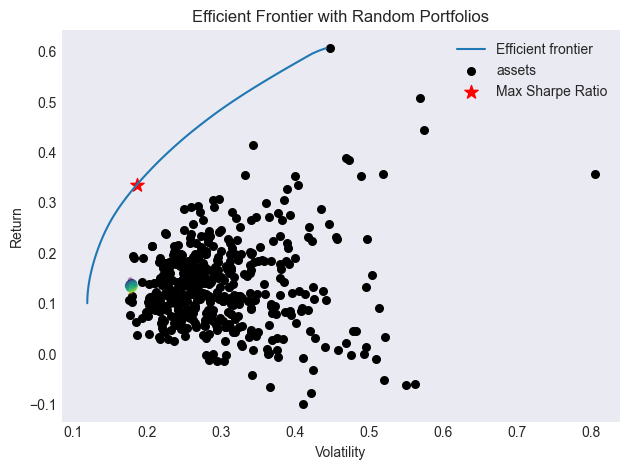

In [114]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df_tech_stocks)
S = risk_models.sample_cov(df_tech_stocks)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate=0.02)  # Set an appropriate risk-free rate
ret_tangent, std_tangent, _ = ef.portfolio_performance()

# Create a new instance for plotting
ef_for_plotting = EfficientFrontier(mu, S)

# Plotting
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=True)

# Mark the point for max Sharpe ratio
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe Ratio")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(alpha=np.ones(len(mu)), size=n_samples)
rets = w.dot(mu.T)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", alpha=0.3)

# Final plot adjustments
ax.set_title("Efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("./figures/tech_portfolio_ef_scatter.png")
plt.show()

key notes:
- Adjust the Scale of the Plot: If the range of returns and volatilities is too narrow, consider adjusting the axes of the plot to better visualize the spread.

- Diversify the Asset Universe: If your data is not diverse enough (e.g., all tech stocks that move similarly), the resulting portfolios might be naturally clustered. Including a wider variety of asset types can lead to a more diversified set of random portfolios.

- Covariance Matrix Adjustments: The sample covariance matrix can sometimes be noisy or ill-conditioned, leading to concentrated portfolios. Regularization techniques or using a different risk model can help spread out the random portfolios.

Make sure that the assets you include in your universe are sufficiently diverse and that the random weights are generated in a way that explores the full space of possible portfolios. If you're still not seeing the spread you expect, you may need to investigate the properties of the assets in your dataset or consider alternative methods for generating random portfolios.

/Users/tdafonseca/Desktop/6-Github/learning/portfolio-optimization/.venv/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


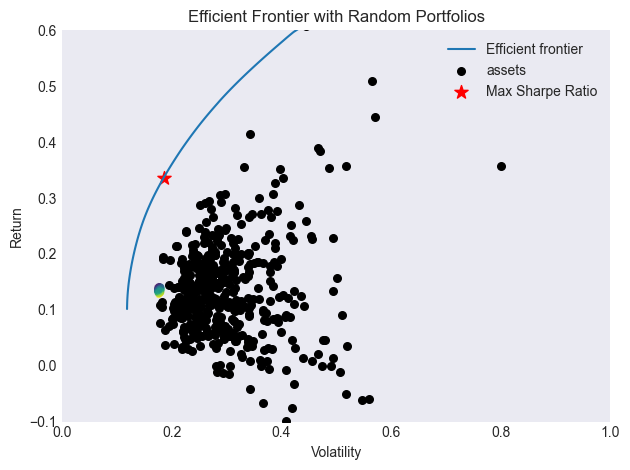

In [117]:
# Diversify the asset universe
# Assuming df_stocks is a DataFrame with prices of stocks from various sectors
mu = expected_returns.mean_historical_return(df_tech_stocks)
# Use shrinkage to obtain a better covariance matrix, get a more stable estimator
S = CovarianceShrinkage(df_tech_stocks).ledoit_wolf()

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()

# Create a new instance for plotting
ef_for_plotting = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=True)

# Mark the point for max Sharpe ratio
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe Ratio")

# Generate random portfolios
n_samples = 10000
w = np.random.uniform(0, 1, (n_samples, len(mu)))
w /= np.sum(w, axis=1)[:, np.newaxis]
rets = w.dot(mu.T)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", alpha=0.3)

# Adjust the scale of the plot
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=-0.1, top=0.6)

# Output
ax.set_title("Efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("./figures/expanded_tech_portfolio_ef_scatter.png")
plt.show()